<h1 align=center>Pesquisa, mineração e visualização de dados<h/1>
<p align=center><img src=https://img.freepik.com/vetores-premium/mineracao-de-dados-conceito-de-pessoa-de-criacao-de-grafico-grafico-minusculo-torta-de-dados-simbolicos-pesquisa-de-diagrama-processo-de-software-de-analise-isometrica-visualizacao-de-coleta-de-informacoes-abstratas_126608-1005.jpg?w=2000 width=500></p>

In [22]:
import json
import requests

raw_json = requests.get("http://api.ipstack.com/134.201.250.155?access_key=4c762af647f6788b2be52091f1196330").text
parsed = json.loads(raw_json)
print(json.dumps(parsed, indent=4, sort_keys=True))

{
    "city": "Los Angeles",
    "continent_code": "NA",
    "continent_name": "North America",
    "country_code": "US",
    "country_name": "United States",
    "ip": "134.201.250.155",
    "latitude": 34.0655517578125,
    "location": {
        "calling_code": "1",
        "capital": "Washington D.C.",
        "country_flag": "https://assets.ipstack.com/flags/us.svg",
        "country_flag_emoji": "\ud83c\uddfa\ud83c\uddf8",
        "country_flag_emoji_unicode": "U+1F1FA U+1F1F8",
        "geoname_id": 5368361,
        "is_eu": false,
        "languages": [
            {
                "code": "en",
                "name": "English",
                "native": "English"
            }
        ]
    },
    "longitude": -118.24053955078125,
    "region_code": "CA",
    "region_name": "California",
    "type": "ipv4",
    "zip": "90012"
}


<h3>Como coletar endereços IP de edições da Wikipedia</h3>

O processamento de resultados agregados de endereços IP geocodificados pode fornecer informações valiosas. Isso é muito comum para logs do servidor e também pode ser usado em muitas outras situações. Muitos sites incluem o endereço IP dos contribuidores de conteúdo. A Wikipedia fornece um histórico de alterações em todas as suas páginas. Edições criadas por alguém que não é usuário registrado da Wikipédia têm seu endereço IP publicado no histórico. Examinaremos como criar um scraper que navegará no histórico de um determinado tópico da Wikipédia e coletar os endereços IP de edições não registradas.

In [23]:
from bs4 import BeautifulSoup
import requests
import json

def get_history_ips(article_title, limit):
    history_page_url = "https://en.wikipedia.org/w/index.php?title=%s&offset=&limit=%s&action=history" % (article_title, limit)
    print("Reading page: " + history_page_url)
    html = requests.get(history_page_url).text
    soup = BeautifulSoup(html, "lxml")

    anon_ip_anchors = soup.findAll("a", {"class": "mw-anonuserlink"})
    addresses = set()
    for ip in anon_ip_anchors:
        addresses.add(ip.get_text())
    return addresses

def get_geo_ips(ip_addresses):
    geo_ips = []
    for ip in ip_addresses:
        raw_json = requests.get(f"https://api.ipstack.com/{ip}?access_key=4c762af647f6788b2be52091f1196330").text
        parsed = json.loads(raw_json)
        geo_ips.append(parsed)
    return geo_ips

def collect_geo_ips(article_title, limit):
    ip_addresses = get_history_ips(article_title, limit)
    print("Got %s ip addresses" % len(ip_addresses))
    geo_ips = get_geo_ips(ip_addresses)
    return geo_ips

if __name__ == "__main__":
    geo_ips = collect_geo_ips('Web_scraping', 500)
    for geo_ip in geo_ips:
        print(geo_ip)
    with open('geo_ips.json', 'w') as outfile:
        json.dump(geo_ips, outfile)

Reading page: https://en.wikipedia.org/w/index.php?title=Web_scraping&offset=&limit=500&action=history
Got 94 ip addresses
{'success': False, 'error': {'code': 104, 'type': 'usage_limit_reached', 'info': 'Your monthly usage limit has been reached. Please upgrade your Subscription Plan.'}}
{'success': False, 'error': {'code': 104, 'type': 'usage_limit_reached', 'info': 'Your monthly usage limit has been reached. Please upgrade your Subscription Plan.'}}
{'success': False, 'error': {'code': 104, 'type': 'usage_limit_reached', 'info': 'Your monthly usage limit has been reached. Please upgrade your Subscription Plan.'}}
{'success': False, 'error': {'code': 104, 'type': 'usage_limit_reached', 'info': 'Your monthly usage limit has been reached. Please upgrade your Subscription Plan.'}}
{'success': False, 'error': {'code': 104, 'type': 'usage_limit_reached', 'info': 'Your monthly usage limit has been reached. Please upgrade your Subscription Plan.'}}
{'success': False, 'error': {'code': 104, 

<h3>Visualizando a frequência de localização do colaborador na Wikipedia</h3>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('geo_ips.json')
df[:5]

,success,error
0,False,"{'code': 104, 'type': 'usage_limit_reached', '..."
1,False,"{'code': 104, 'type': 'usage_limit_reached', '..."
2,False,"{'code': 104, 'type': 'usage_limit_reached', '..."
3,False,"{'code': 104, 'type': 'usage_limit_reached', '..."
4,False,"{'code': 104, 'type': 'usage_limit_reached', '..."


In [25]:
# Levantando o código do País
countries_only = df.country_code
countries_only[:5]

AttributeError: 'DataFrame' object has no attribute 'country_code'

In [ ]:
# Agrupando as linhas
counts = df.groupby('country_code')['country_code'].count().sort_values(ascending=False)

counts[:5]

In [ ]:
# Visualizando o Gráfico

counts.plot(kind='bar')
plt.show()

<h3>Criando uma nuvem de palavras a partir de uma lista de vagas do StackOverflow</h3>

Agora vamos ver como criar uma nuvem de palavras. Nuvens de palavras são uma imagem que demonstra a frequência de palavras-chave dentro de um conjunto de texto.

In [ ]:
from wordcloud.wordcloud import WordCloud
from nltk.probability import FreqDist

freq_dist = FreqDist(cleaned)
wordcloud = WordCloud(width=1200, height=800).generate_from_frequencies(freq_dist)

# Plotar a imagem da Wordcloud

from matplotlib import pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h3>Rastreando links na Wikipedia</h3>

In [1]:
from spider import WikipediaSpider
from scrapy.crawler import CrawlerProcess

if __name__ == "__main__":
    process = CrawlerProcess({
        'LOG_LEVEL': 'ERROR',
        'DEPTH_LIMIT': 1
    })

    process.crawl(WikipediaSpider)
    spider = next(iter(process.crawlers)).spider
    process.start()

    print("-"*60)

    for pm in spider.linked_pages:
        print(pm.depth, pm.title, pm.child_title)

parsing: https://en.wikipedia.org/wiki/Python_(programming_language)
parsing: https://en.wikipedia.org/wiki/ISBN_(identifier)
parsing: https://en.wikipedia.org/wiki/CPython
parsing: https://en.wikipedia.org/wiki/Guido_van_Rossum
parsing: https://en.wikipedia.org/wiki/PyPy
parsing: https://en.wikipedia.org/wiki/Ruby_(programming_language)
------------------------------------------------------------
0 Python_(programming_language) ISBN_(identifier)
0 Python_(programming_language) Guido_van_Rossum
0 Python_(programming_language) CPython
0 Python_(programming_language) Ruby_(programming_language)
0 Python_(programming_language) PyPy


<h3>Visualizando relacionamentos de página na Wikipédia</h3

parsing: https://en.wikipedia.org/wiki/Python_(programming_language)
parsing: https://en.wikipedia.org/wiki/ISBN_(identifier)
parsing: https://en.wikipedia.org/wiki/Film_speed
parsing: https://en.wikipedia.org/wiki/Guido_van_Rossum
parsing: https://en.wikipedia.org/wiki/CPython
parsing: https://en.wikipedia.org/wiki/PyPy
parsing: https://en.wikipedia.org/wiki/Ruby_(programming_language)
parsing: https://en.wikipedia.org/wiki/Bookland
parsing: https://en.wikipedia.org/wiki/ABC_(programming_language)
parsing: https://en.wikipedia.org/wiki/Check_digit
parsing: https://en.wikipedia.org/wiki/Modular_arithmetic
parsing: https://en.wikipedia.org/wiki/Microsoft
parsing: https://en.wikipedia.org/wiki/Toolchain
parsing: https://en.wikipedia.org/wiki/University_of_Amsterdam
parsing: https://en.wikipedia.org/wiki/Dropbox_(service)
parsing: https://en.wikipedia.org/wiki/Psyco
parsing: https://en.wikipedia.org/wiki/Just-in-time_compilation
parsing: https://en.wikipedia.org/wiki/Repository_(version_c

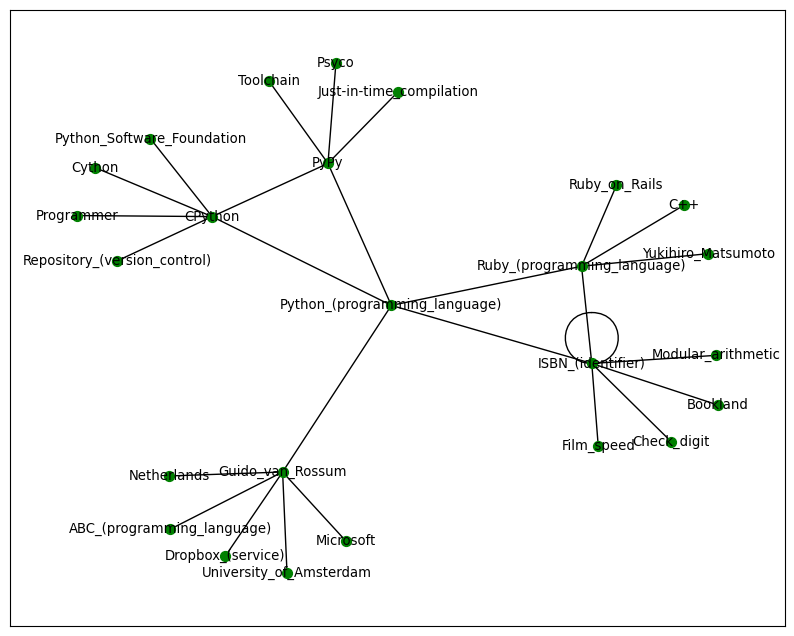

In [1]:
from spider import WikipediaSpider
from scrapy.crawler import CrawlerProcess
import networkx as nx
import matplotlib.pyplot as plt


if __name__ == "__main__":
    crawl_depth = 2
    process = CrawlerProcess({
        'LOG_LEVEL': 'ERROR',
        'DEPTH_LIMIT': crawl_depth
    })
    process.crawl(WikipediaSpider)
    spider = next(iter(process.crawlers)).spider
    spider.max_items_per_page = 5
    spider.max_crawl_depth = crawl_depth
    process.start(stop_after_crawl=True)

    for pm in spider.linked_pages:
        print(pm.depth, pm.link, pm.child_link)
    print("-"*80)

    g = nx.Graph()

    nodes = {}
    edges = {}

    for pm in spider.linked_pages:
        if pm.title not in nodes:
            nodes[pm.title] = pm
            g.add_node(pm.title)

        if pm.child_title not in nodes:
            g.add_node(pm.child_title)

        link_key = pm.title + " ==> " + pm.child_title
        if link_key not in edges:
            edges[link_key] = link_key
            g.add_edge(pm.title, pm.child_title)

    plt.figure(figsize=(10,8))

    node_positions = nx.spring_layout(g)

    nx.draw_networkx_nodes(g, node_positions, g.nodes, node_color='green', node_size=50)
    nx.draw_networkx_edges(g, node_positions)

    labels = { node: node for node in g.nodes() }
    nx.draw_networkx_labels(g, node_positions, labels, font_size=9.5)

    plt.show()

<h3>Calculando os degraus de separação</h3>

In [1]:
from spider import WikipediaSpider
from scrapy.crawler import CrawlerProcess
import networkx as nx


if __name__ == "__main__":
    crawl_depth = 2
    process = CrawlerProcess({
        'LOG_LEVEL': 'ERROR',
        'DEPTH_LIMIT': crawl_depth
    })
    process.crawl(WikipediaSpider)
    spider = next(iter(process.crawlers)).spider
    spider.max_items_per_page = 5
    spider.max_crawl_depth = crawl_depth
    process.start()

    for pm in spider.linked_pages:
        print(pm.depth, pm.link, pm.child_link)
    print("-"*80)

    g = nx.Graph()

    nodes = {}
    edges = {}


    for pm in spider.linked_pages:
        if pm.title not in nodes:
            nodes[pm.title] = pm
            g.add_node(pm.title)

        if pm.child_title not in nodes:
            g.add_node(pm.child_title)

        link_key = pm.title + " ==> " + pm.child_title
        if link_key not in edges:
            edges[link_key] = link_key
            g.add_edge(pm.title, pm.child_title)

    labels = { node: node for node in g.nodes() }

    path = nx.astar_path(g, "Python_(programming_language)", "Guido_van_Rossum")

    # report
    degrees_of_separation = int((len(path) - 1) / 2)
    print("Degrees of separation: {}".format(degrees_of_separation))
    for i in range(0, len(path)):
        print(" " * i, path[i])

parsing: https://en.wikipedia.org/wiki/Python_(programming_language)
parsing: https://en.wikipedia.org/wiki/ISBN_(identifier)
parsing: https://en.wikipedia.org/wiki/Film_speed
parsing: https://en.wikipedia.org/wiki/PyPy
parsing: https://en.wikipedia.org/wiki/CPython
parsing: https://en.wikipedia.org/wiki/Guido_van_Rossum
parsing: https://en.wikipedia.org/wiki/Bookland
parsing: https://en.wikipedia.org/wiki/Ruby_(programming_language)
parsing: https://en.wikipedia.org/wiki/Toolchain
parsing: https://en.wikipedia.org/wiki/Just-in-time_compilation
parsing: https://en.wikipedia.org/wiki/Psyco
parsing: https://en.wikipedia.org/wiki/Check_digit
parsing: https://en.wikipedia.org/wiki/Repository_(version_control)
parsing: https://en.wikipedia.org/wiki/Modular_arithmetic
parsing: https://en.wikipedia.org/wiki/Cython
parsing: https://en.wikipedia.org/wiki/Programmer
parsing: https://en.wikipedia.org/wiki/Python_Software_Foundation
parsing: https://en.wikipedia.org/wiki/Python_(programming_langua